## 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train_sandander.csv", encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 DataFrame의 맨 마지막에 위치해 칼럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


## XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [8]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정.
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85831	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88238	validation_1-auc:0.84101
[17]	validation_0-auc:0.88354	validation_1-auc:0.84071
[18]	validation_0-au

In [10]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}

# cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf,  param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80289	validation_1-auc:0.80420
[1]	validation_0-auc:0.80678	validation_1-auc:0.80892
[2]	validation_0-auc:0.82161	validation_1-auc:0.81979
[3]	validation_0-auc:0.82876	validation_1-auc:0.82509
[4]	validation_0-auc:0.83227	validation_1-auc:0.82868
[5]	validation_0-auc:0.83179	validation_1-auc:0.82649
[6]	validation_0-auc:0.82661	validation_1-auc:0.81879
[7]	validation_0-auc:0.83687	validation_1-auc:0.82901
[8]	validation_0-auc:0.84136	validation_1-auc:0.83545
[9]	validation_0-auc:0.84304	validation_1-auc:0.83301
[10]	validation_0-auc:0.84221	validation_1-auc:0.83210
[11]	validation_0-auc:0.84723	validation_1-auc:0.83457
[12]	validation_0-auc:0.85186	validation_1-auc:0.83740
[13]	validation_0-auc:0.85372	validation_1-auc:0.83434
[14]	validation_0-auc:0.85631	validation_1-auc:0.83641
[15]	validation_0-auc:0.85719	validation_1-auc:0.83617
[16]	validation_0-auc:0.85907	validation_1-auc:0.83443
[17]	validation_0-auc:0.86100	validation_1-auc:0.83417
[18]	validation_0-au

[0]	validation_0-auc:0.80246	validation_1-auc:0.80463
[1]	validation_0-auc:0.80769	validation_1-auc:0.80995
[2]	validation_0-auc:0.82216	validation_1-auc:0.82059
[3]	validation_0-auc:0.82983	validation_1-auc:0.82797
[4]	validation_0-auc:0.83294	validation_1-auc:0.82964
[5]	validation_0-auc:0.83289	validation_1-auc:0.82807
[6]	validation_0-auc:0.82913	validation_1-auc:0.82282
[7]	validation_0-auc:0.83623	validation_1-auc:0.82949
[8]	validation_0-auc:0.84169	validation_1-auc:0.83424
[9]	validation_0-auc:0.84276	validation_1-auc:0.83206
[10]	validation_0-auc:0.84290	validation_1-auc:0.83209
[11]	validation_0-auc:0.84726	validation_1-auc:0.83490
[12]	validation_0-auc:0.85185	validation_1-auc:0.83765
[13]	validation_0-auc:0.85354	validation_1-auc:0.83497
[14]	validation_0-auc:0.85519	validation_1-auc:0.83661
[15]	validation_0-auc:0.85551	validation_1-auc:0.83619
[16]	validation_0-auc:0.85659	validation_1-auc:0.83520
[17]	validation_0-auc:0.85731	validation_1-auc:0.83493
[18]	validation_0-au

[0]	validation_0-auc:0.80902	validation_1-auc:0.80594
[1]	validation_0-auc:0.80814	validation_1-auc:0.80463
[2]	validation_0-auc:0.82929	validation_1-auc:0.82254
[3]	validation_0-auc:0.83621	validation_1-auc:0.82625
[4]	validation_0-auc:0.83964	validation_1-auc:0.82813
[5]	validation_0-auc:0.84237	validation_1-auc:0.82613
[6]	validation_0-auc:0.84139	validation_1-auc:0.82316
[7]	validation_0-auc:0.84976	validation_1-auc:0.82936
[8]	validation_0-auc:0.85363	validation_1-auc:0.83274
[9]	validation_0-auc:0.85616	validation_1-auc:0.82987
[10]	validation_0-auc:0.85494	validation_1-auc:0.82878
[11]	validation_0-auc:0.86352	validation_1-auc:0.83263
[12]	validation_0-auc:0.86903	validation_1-auc:0.83413
[13]	validation_0-auc:0.87059	validation_1-auc:0.83155
[14]	validation_0-auc:0.87381	validation_1-auc:0.83338
[15]	validation_0-auc:0.87434	validation_1-auc:0.83100
[16]	validation_0-auc:0.87539	validation_1-auc:0.83110
[17]	validation_0-auc:0.87742	validation_1-auc:0.82964
[18]	validation_0-au

[18]	validation_0-auc:0.87331	validation_1-auc:0.83720
[19]	validation_0-auc:0.87494	validation_1-auc:0.83866
[20]	validation_0-auc:0.87632	validation_1-auc:0.83891
[21]	validation_0-auc:0.87625	validation_1-auc:0.83803
[22]	validation_0-auc:0.87797	validation_1-auc:0.83851
[23]	validation_0-auc:0.87831	validation_1-auc:0.83796
[24]	validation_0-auc:0.87965	validation_1-auc:0.83699
[25]	validation_0-auc:0.88009	validation_1-auc:0.83691
[26]	validation_0-auc:0.88117	validation_1-auc:0.83606
[27]	validation_0-auc:0.88189	validation_1-auc:0.83456
[28]	validation_0-auc:0.88208	validation_1-auc:0.83477
[29]	validation_0-auc:0.88227	validation_1-auc:0.83469
[30]	validation_0-auc:0.88357	validation_1-auc:0.83483
[31]	validation_0-auc:0.88396	validation_1-auc:0.83445
[32]	validation_0-auc:0.88416	validation_1-auc:0.83445
[33]	validation_0-auc:0.88424	validation_1-auc:0.83429
[34]	validation_0-auc:0.88452	validation_1-auc:0.83355
[35]	validation_0-auc:0.88483	validation_1-auc:0.83345
[36]	valid

[22]	validation_0-auc:0.86556	validation_1-auc:0.83346
[23]	validation_0-auc:0.86611	validation_1-auc:0.83304
[24]	validation_0-auc:0.86640	validation_1-auc:0.83371
[25]	validation_0-auc:0.86666	validation_1-auc:0.83331
[26]	validation_0-auc:0.86739	validation_1-auc:0.83306
[27]	validation_0-auc:0.86772	validation_1-auc:0.83277
[28]	validation_0-auc:0.86800	validation_1-auc:0.83259
[29]	validation_0-auc:0.86799	validation_1-auc:0.83250
[30]	validation_0-auc:0.86864	validation_1-auc:0.83234
[31]	validation_0-auc:0.86963	validation_1-auc:0.83222
[32]	validation_0-auc:0.87135	validation_1-auc:0.83277
[33]	validation_0-auc:0.87222	validation_1-auc:0.83281
[34]	validation_0-auc:0.87252	validation_1-auc:0.83300
[35]	validation_0-auc:0.87338	validation_1-auc:0.83264
[36]	validation_0-auc:0.87365	validation_1-auc:0.83223
[37]	validation_0-auc:0.87397	validation_1-auc:0.83247
[38]	validation_0-auc:0.87425	validation_1-auc:0.83302
[39]	validation_0-auc:0.87450	validation_1-auc:0.83187
[0]	valida

[18]	validation_0-auc:0.85988	validation_1-auc:0.83665
[19]	validation_0-auc:0.86047	validation_1-auc:0.83641
[20]	validation_0-auc:0.86212	validation_1-auc:0.83672
[21]	validation_0-auc:0.86222	validation_1-auc:0.83658
[22]	validation_0-auc:0.86258	validation_1-auc:0.83669
[23]	validation_0-auc:0.86370	validation_1-auc:0.83622
[24]	validation_0-auc:0.86456	validation_1-auc:0.83612
[25]	validation_0-auc:0.86481	validation_1-auc:0.83654
[26]	validation_0-auc:0.86513	validation_1-auc:0.83589
[27]	validation_0-auc:0.86544	validation_1-auc:0.83557
[28]	validation_0-auc:0.86577	validation_1-auc:0.83558
[29]	validation_0-auc:0.86583	validation_1-auc:0.83583
[30]	validation_0-auc:0.86613	validation_1-auc:0.83515
[31]	validation_0-auc:0.86637	validation_1-auc:0.83521
[32]	validation_0-auc:0.86696	validation_1-auc:0.83518
[33]	validation_0-auc:0.86717	validation_1-auc:0.83535
[34]	validation_0-auc:0.86755	validation_1-auc:0.83520
[35]	validation_0-auc:0.86811	validation_1-auc:0.83506
[36]	valid

[28]	validation_0-auc:0.89093	validation_1-auc:0.83229
[29]	validation_0-auc:0.89102	validation_1-auc:0.83245
[30]	validation_0-auc:0.89104	validation_1-auc:0.83259
[31]	validation_0-auc:0.89142	validation_1-auc:0.83219
[32]	validation_0-auc:0.89238	validation_1-auc:0.83115
[33]	validation_0-auc:0.89232	validation_1-auc:0.83080
[34]	validation_0-auc:0.89242	validation_1-auc:0.83077
[35]	validation_0-auc:0.89255	validation_1-auc:0.83114
[36]	validation_0-auc:0.89273	validation_1-auc:0.83110
[37]	validation_0-auc:0.89287	validation_1-auc:0.83083
[38]	validation_0-auc:0.89335	validation_1-auc:0.83049
[39]	validation_0-auc:0.89528	validation_1-auc:0.82890
[0]	validation_0-auc:0.81428	validation_1-auc:0.80541
[1]	validation_0-auc:0.81563	validation_1-auc:0.81176
[2]	validation_0-auc:0.83592	validation_1-auc:0.82066
[3]	validation_0-auc:0.84379	validation_1-auc:0.82740
[4]	validation_0-auc:0.85017	validation_1-auc:0.83233
[5]	validation_0-auc:0.85384	validation_1-auc:0.83518
[6]	validation_0

[16]	validation_0-auc:0.87631	validation_1-auc:0.84078
[17]	validation_0-auc:0.87671	validation_1-auc:0.84143
[18]	validation_0-auc:0.87775	validation_1-auc:0.84117
[19]	validation_0-auc:0.87852	validation_1-auc:0.84073
[20]	validation_0-auc:0.87945	validation_1-auc:0.84043
[21]	validation_0-auc:0.88031	validation_1-auc:0.84016
[22]	validation_0-auc:0.88153	validation_1-auc:0.84011
[23]	validation_0-auc:0.88229	validation_1-auc:0.84037
[24]	validation_0-auc:0.88304	validation_1-auc:0.84030
[25]	validation_0-auc:0.88319	validation_1-auc:0.84035
[26]	validation_0-auc:0.88333	validation_1-auc:0.84042
[27]	validation_0-auc:0.88379	validation_1-auc:0.83981
[28]	validation_0-auc:0.88441	validation_1-auc:0.83969
[29]	validation_0-auc:0.88435	validation_1-auc:0.83984
[30]	validation_0-auc:0.88452	validation_1-auc:0.83927
[31]	validation_0-auc:0.88479	validation_1-auc:0.83854
[32]	validation_0-auc:0.88530	validation_1-auc:0.83809
[33]	validation_0-auc:0.88531	validation_1-auc:0.83816
[34]	valid

In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함.
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5, min_child_weight=3, colsample_bytree=0.5, reg_alpha=0.03)

# 성능 평가 지표를 auc로, 조기 중단 파라미터 값은 200으로 설정하고 학습 수행.
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

/usr/local/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.81685	validation_1-auc:0.81591
[1]	validation_0-auc:0.82114	validation_1-auc:0.81542
[2]	validation_0-auc:0.82466	validation_1-auc:0.81971
[3]	validation_0-auc:0.82945	validation_1-auc:0.82483
[4]	validation_0-auc:0.82306	validation_1-auc:0.81920
[5]	validation_0-auc:0.82495	validation_1-auc:0.81961
[6]	validation_0-auc:0.82885	validation_1-auc:0.82360
[7]	validation_0-auc:0.82476	validation_1-auc:0.81885
[8]	validation_0-auc:0.82762	validation_1-auc:0.82098
[9]	validation_0-auc:0.83228	validation_1-auc:0.82627
[10]	validation_0-auc:0.83393	validation_1-auc:0.82770
[11]	validation_0-auc:0.83257	validation_1-auc:0.82678
[12]	validation_0-auc:0.83479	validation_1-auc:0.83051
[13]	validation_0-auc:0.83224	validation_1-auc:0.82811
[14]	validation_0-auc:0.83307	validation_1-auc:0.82812
[15]	validation_0-auc:0.83104	validation_1-auc:0.82798
[16]	validation_0-auc:0.83065	validation_1-auc:0.82739
[17]	validation_0-auc:0.82930	validation_1-auc:0.82645
[18]	validation_0-au

[149]	validation_0-auc:0.85343	validation_1-auc:0.83937
[150]	validation_0-auc:0.85333	validation_1-auc:0.83937
[151]	validation_0-auc:0.85330	validation_1-auc:0.83923
[152]	validation_0-auc:0.85321	validation_1-auc:0.83926
[153]	validation_0-auc:0.85354	validation_1-auc:0.83961
[154]	validation_0-auc:0.85385	validation_1-auc:0.83971
[155]	validation_0-auc:0.85410	validation_1-auc:0.83976
[156]	validation_0-auc:0.85438	validation_1-auc:0.84006
[157]	validation_0-auc:0.85433	validation_1-auc:0.84003
[158]	validation_0-auc:0.85454	validation_1-auc:0.84028
[159]	validation_0-auc:0.85442	validation_1-auc:0.84011
[160]	validation_0-auc:0.85463	validation_1-auc:0.84038
[161]	validation_0-auc:0.85493	validation_1-auc:0.84048
[162]	validation_0-auc:0.85498	validation_1-auc:0.84052
[163]	validation_0-auc:0.85498	validation_1-auc:0.84049
[164]	validation_0-auc:0.85523	validation_1-auc:0.84065
[165]	validation_0-auc:0.85562	validation_1-auc:0.84094
[166]	validation_0-auc:0.85566	validation_1-auc:

[296]	validation_0-auc:0.87061	validation_1-auc:0.84560
[297]	validation_0-auc:0.87073	validation_1-auc:0.84557
[298]	validation_0-auc:0.87080	validation_1-auc:0.84560
[299]	validation_0-auc:0.87089	validation_1-auc:0.84557
[300]	validation_0-auc:0.87092	validation_1-auc:0.84552
[301]	validation_0-auc:0.87100	validation_1-auc:0.84553
[302]	validation_0-auc:0.87111	validation_1-auc:0.84544
[303]	validation_0-auc:0.87117	validation_1-auc:0.84542
[304]	validation_0-auc:0.87127	validation_1-auc:0.84534
[305]	validation_0-auc:0.87136	validation_1-auc:0.84535
[306]	validation_0-auc:0.87141	validation_1-auc:0.84535
[307]	validation_0-auc:0.87152	validation_1-auc:0.84525
[308]	validation_0-auc:0.87156	validation_1-auc:0.84534
[309]	validation_0-auc:0.87165	validation_1-auc:0.84541
[310]	validation_0-auc:0.87173	validation_1-auc:0.84542
[311]	validation_0-auc:0.87179	validation_1-auc:0.84540
[312]	validation_0-auc:0.87183	validation_1-auc:0.84537
[313]	validation_0-auc:0.87186	validation_1-auc:

[443]	validation_0-auc:0.87852	validation_1-auc:0.84456
[444]	validation_0-auc:0.87858	validation_1-auc:0.84456
[445]	validation_0-auc:0.87860	validation_1-auc:0.84456
[446]	validation_0-auc:0.87864	validation_1-auc:0.84456
[447]	validation_0-auc:0.87867	validation_1-auc:0.84456
[448]	validation_0-auc:0.87871	validation_1-auc:0.84452
[449]	validation_0-auc:0.87874	validation_1-auc:0.84451
[450]	validation_0-auc:0.87879	validation_1-auc:0.84445
[451]	validation_0-auc:0.87880	validation_1-auc:0.84446
[452]	validation_0-auc:0.87885	validation_1-auc:0.84444
[453]	validation_0-auc:0.87887	validation_1-auc:0.84445
[454]	validation_0-auc:0.87890	validation_1-auc:0.84441
[455]	validation_0-auc:0.87894	validation_1-auc:0.84438
[456]	validation_0-auc:0.87897	validation_1-auc:0.84433
[457]	validation_0-auc:0.87901	validation_1-auc:0.84430
[458]	validation_0-auc:0.87903	validation_1-auc:0.84431
[459]	validation_0-auc:0.87905	validation_1-auc:0.84431
[460]	validation_0-auc:0.87908	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

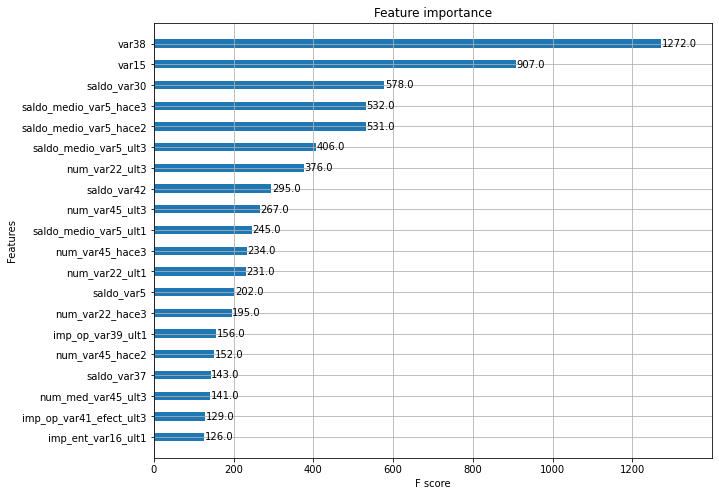

In [9]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

## LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [11]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

/usr/local/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_logloss: 0.14161
[16]	valid_0's auc: 0.840337	valid_0's binary_loglo

In [15]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 200으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves':[32, 64],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}

# cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

/usr/local/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	valid_1's binary_logloss: 0.146543
[9]	valid_0's auc: 0.849328	v

[31]	valid_0's auc: 0.874768	valid_0's binary_logloss: 0.123745	valid_1's auc: 0.839314	valid_1's binary_logloss: 0.139314
[32]	valid_0's auc: 0.875593	valid_0's binary_logloss: 0.123486	valid_1's auc: 0.838875	valid_1's binary_logloss: 0.139322
[33]	valid_0's auc: 0.8767	valid_0's binary_logloss: 0.123182	valid_1's auc: 0.838809	valid_1's binary_logloss: 0.139329
[34]	valid_0's auc: 0.87774	valid_0's binary_logloss: 0.122892	valid_1's auc: 0.838376	valid_1's binary_logloss: 0.139342
[35]	valid_0's auc: 0.878372	valid_0's binary_logloss: 0.122634	valid_1's auc: 0.838454	valid_1's binary_logloss: 0.13931
[36]	valid_0's auc: 0.879098	valid_0's binary_logloss: 0.122414	valid_1's auc: 0.838895	valid_1's binary_logloss: 0.13925
[37]	valid_0's auc: 0.879502	valid_0's binary_logloss: 0.122216	valid_1's auc: 0.838441	valid_1's binary_logloss: 0.139302
[38]	valid_0's auc: 0.880036	valid_0's binary_logloss: 0.121998	valid_1's auc: 0.838582	valid_1's binary_logloss: 0.139306
[39]	valid_0's auc: 0

[57]	valid_0's auc: 0.889157	valid_0's binary_logloss: 0.118369	valid_1's auc: 0.837585	valid_1's binary_logloss: 0.139447
[58]	valid_0's auc: 0.889659	valid_0's binary_logloss: 0.11819	valid_1's auc: 0.837789	valid_1's binary_logloss: 0.139431
[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144

[32]	valid_0's auc: 0.875593	valid_0's binary_logloss: 0.123486	valid_1's auc: 0.838875	valid_1's binary_logloss: 0.139322
[33]	valid_0's auc: 0.8767	valid_0's binary_logloss: 0.123182	valid_1's auc: 0.838809	valid_1's binary_logloss: 0.139329
[34]	valid_0's auc: 0.87774	valid_0's binary_logloss: 0.122892	valid_1's auc: 0.838376	valid_1's binary_logloss: 0.139342
[35]	valid_0's auc: 0.878372	valid_0's binary_logloss: 0.122634	valid_1's auc: 0.838454	valid_1's binary_logloss: 0.13931
[36]	valid_0's auc: 0.879098	valid_0's binary_logloss: 0.122414	valid_1's auc: 0.838895	valid_1's binary_logloss: 0.13925
[37]	valid_0's auc: 0.879502	valid_0's binary_logloss: 0.122216	valid_1's auc: 0.838441	valid_1's binary_logloss: 0.139302
[38]	valid_0's auc: 0.880036	valid_0's binary_logloss: 0.121998	valid_1's auc: 0.838582	valid_1's binary_logloss: 0.139306
[39]	valid_0's auc: 0.880641	valid_0's binary_logloss: 0.121716	valid_1's auc: 0.838787	valid_1's binary_logloss: 0.139269
[40]	valid_0's auc: 0

[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logloss: 0.145627	valid_1's auc: 0.826851	valid_1's binary_logloss: 0.15631
[4]	valid_0's auc: 0.851096	valid_0's binary_logloss: 0.142423	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.854735	valid_0's binary_logloss: 0.139746	valid_1's auc: 0.832753	valid_1's binary_logloss: 0.151136
[6]	valid_0's auc: 0.856928	valid_0's binary_logloss: 0.137509	valid_1's auc: 0.835605	valid_1's binary_logloss: 0.14924
[7]	valid_0's auc: 0.859448	valid_0's binary_logloss: 0.135575	valid_1's auc: 0.835612	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.861685	valid_0's binary_logloss: 0.133953	valid_1's auc: 0.834408	valid_1's binary_logloss: 0.146634
[9]	valid_0's auc: 0.863391	va

[33]	valid_0's auc: 0.894791	valid_0's binary_logloss: 0.116671	valid_1's auc: 0.836753	valid_1's binary_logloss: 0.139812
[34]	valid_0's auc: 0.895313	valid_0's binary_logloss: 0.116321	valid_1's auc: 0.836733	valid_1's binary_logloss: 0.139826
[35]	valid_0's auc: 0.895876	valid_0's binary_logloss: 0.116039	valid_1's auc: 0.836245	valid_1's binary_logloss: 0.139883
[36]	valid_0's auc: 0.896909	valid_0's binary_logloss: 0.115684	valid_1's auc: 0.836079	valid_1's binary_logloss: 0.139912
[37]	valid_0's auc: 0.897427	valid_0's binary_logloss: 0.115388	valid_1's auc: 0.835564	valid_1's binary_logloss: 0.140024
[38]	valid_0's auc: 0.898442	valid_0's binary_logloss: 0.115006	valid_1's auc: 0.835612	valid_1's binary_logloss: 0.140075
[39]	valid_0's auc: 0.899304	valid_0's binary_logloss: 0.114592	valid_1's auc: 0.836273	valid_1's binary_logloss: 0.139974
[40]	valid_0's auc: 0.89974	valid_0's binary_logloss: 0.11432	valid_1's auc: 0.836096	valid_1's binary_logloss: 0.140042
[1]	valid_0's auc:

[7]	valid_0's auc: 0.859448	valid_0's binary_logloss: 0.135575	valid_1's auc: 0.835612	valid_1's binary_logloss: 0.147799
[8]	valid_0's auc: 0.861685	valid_0's binary_logloss: 0.133953	valid_1's auc: 0.834408	valid_1's binary_logloss: 0.146634
[9]	valid_0's auc: 0.863391	valid_0's binary_logloss: 0.132468	valid_1's auc: 0.835623	valid_1's binary_logloss: 0.145549
[10]	valid_0's auc: 0.865858	valid_0's binary_logloss: 0.131185	valid_1's auc: 0.83487	valid_1's binary_logloss: 0.144745
[11]	valid_0's auc: 0.867134	valid_0's binary_logloss: 0.130116	valid_1's auc: 0.834692	valid_1's binary_logloss: 0.14411
[12]	valid_0's auc: 0.868217	valid_0's binary_logloss: 0.129097	valid_1's auc: 0.834746	valid_1's binary_logloss: 0.143527
[13]	valid_0's auc: 0.87073	valid_0's binary_logloss: 0.128129	valid_1's auc: 0.833582	valid_1's binary_logloss: 0.143122
[14]	valid_0's auc: 0.872621	valid_0's binary_logloss: 0.12721	valid_1's auc: 0.833205	valid_1's binary_logloss: 0.142745
[15]	valid_0's auc: 0.8

[36]	valid_0's auc: 0.896909	valid_0's binary_logloss: 0.115684	valid_1's auc: 0.836079	valid_1's binary_logloss: 0.139912
[37]	valid_0's auc: 0.897427	valid_0's binary_logloss: 0.115388	valid_1's auc: 0.835564	valid_1's binary_logloss: 0.140024
[38]	valid_0's auc: 0.898442	valid_0's binary_logloss: 0.115006	valid_1's auc: 0.835612	valid_1's binary_logloss: 0.140075
[39]	valid_0's auc: 0.899304	valid_0's binary_logloss: 0.114592	valid_1's auc: 0.836273	valid_1's binary_logloss: 0.139974
[40]	valid_0's auc: 0.89974	valid_0's binary_logloss: 0.11432	valid_1's auc: 0.836096	valid_1's binary_logloss: 0.140042
[1]	valid_0's auc: 0.830643	valid_0's binary_logloss: 0.155759	valid_1's auc: 0.816734	valid_1's binary_logloss: 0.164985
[2]	valid_0's auc: 0.839353	valid_0's binary_logloss: 0.149977	valid_1's auc: 0.822571	valid_1's binary_logloss: 0.159808
[3]	valid_0's auc: 0.847366	valid_0's binary_logloss: 0.145866	valid_1's auc: 0.829312	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.

[9]	valid_0's auc: 0.848442	valid_0's binary_logloss: 0.135908	valid_1's auc: 0.835976	valid_1's binary_logloss: 0.145685
[10]	valid_0's auc: 0.849759	valid_0's binary_logloss: 0.134781	valid_1's auc: 0.836214	valid_1's binary_logloss: 0.144769
[11]	valid_0's auc: 0.852238	valid_0's binary_logloss: 0.133835	valid_1's auc: 0.837243	valid_1's binary_logloss: 0.143925
[12]	valid_0's auc: 0.853743	valid_0's binary_logloss: 0.132972	valid_1's auc: 0.836647	valid_1's binary_logloss: 0.143391
[13]	valid_0's auc: 0.854568	valid_0's binary_logloss: 0.132256	valid_1's auc: 0.837182	valid_1's binary_logloss: 0.142849
[14]	valid_0's auc: 0.855928	valid_0's binary_logloss: 0.131554	valid_1's auc: 0.835941	valid_1's binary_logloss: 0.142474
[15]	valid_0's auc: 0.85712	valid_0's binary_logloss: 0.130984	valid_1's auc: 0.834938	valid_1's binary_logloss: 0.142198
[16]	valid_0's auc: 0.858721	valid_0's binary_logloss: 0.130371	valid_1's auc: 0.83561	valid_1's binary_logloss: 0.141802
[17]	valid_0's auc:

[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
[2]	valid_0's auc: 0.827893	valid_0's binary_logloss: 0.151336	valid_1's auc: 0.820533	valid_1's binary_logloss: 0.160243
[3]	valid_0's auc: 0.83753	valid_0's binary_logloss: 0.147487	valid_1's auc: 0.82841	valid_1's binary_logloss: 0.156547
[4]	valid_0's auc: 0.84038	valid_0's binary_logloss: 0.144428	valid_1's auc: 0.8313	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842945	valid_0's binary_logloss: 0.142089	valid_1's auc: 0.833579	valid_1's binary_logloss: 0.151354
[6]	valid_0's auc: 0.843246	valid_0's binary_logloss: 0.140186	valid_1's auc: 0.833781	valid_1's binary_logloss: 0.14953
[7]	valid_0's auc: 0.844301	valid_0's binary_logloss: 0.138471	valid_1's auc: 0.834317	valid_1's binary_logloss: 0.147954
[8]	valid_0's auc: 0.846945	valid_0's binary_logloss: 0.137078	valid_1's auc: 0.834895	valid_1's binary_logloss: 0.146786
[9]	valid_0's auc: 0.849381	val

[7]	valid_0's auc: 0.846477	valid_0's binary_logloss: 0.138491	valid_1's auc: 0.833143	valid_1's binary_logloss: 0.148023
[8]	valid_0's auc: 0.847725	valid_0's binary_logloss: 0.137129	valid_1's auc: 0.833971	valid_1's binary_logloss: 0.146757
[9]	valid_0's auc: 0.848442	valid_0's binary_logloss: 0.135908	valid_1's auc: 0.835976	valid_1's binary_logloss: 0.145685
[10]	valid_0's auc: 0.849759	valid_0's binary_logloss: 0.134781	valid_1's auc: 0.836214	valid_1's binary_logloss: 0.144769
[11]	valid_0's auc: 0.852238	valid_0's binary_logloss: 0.133835	valid_1's auc: 0.837243	valid_1's binary_logloss: 0.143925
[12]	valid_0's auc: 0.853743	valid_0's binary_logloss: 0.132972	valid_1's auc: 0.836647	valid_1's binary_logloss: 0.143391
[13]	valid_0's auc: 0.854568	valid_0's binary_logloss: 0.132256	valid_1's auc: 0.837182	valid_1's binary_logloss: 0.142849
[14]	valid_0's auc: 0.855928	valid_0's binary_logloss: 0.131554	valid_1's auc: 0.835941	valid_1's binary_logloss: 0.142474
[15]	valid_0's auc:

[34]	valid_0's auc: 0.873965	valid_0's binary_logloss: 0.124108	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.139263
[35]	valid_0's auc: 0.87457	valid_0's binary_logloss: 0.123857	valid_1's auc: 0.838159	valid_1's binary_logloss: 0.139137
[36]	valid_0's auc: 0.874973	valid_0's binary_logloss: 0.123651	valid_1's auc: 0.838114	valid_1's binary_logloss: 0.139148
[37]	valid_0's auc: 0.875657	valid_0's binary_logloss: 0.123447	valid_1's auc: 0.838519	valid_1's binary_logloss: 0.139109
[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156592	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165273
[2]	valid_0's auc: 0.827893	valid_0's binary_logloss: 0.151336	valid_1's auc: 0.820533	valid_1's binary_logloss: 0.160243
[3]	valid_0's auc: 0.83753	valid_0's binary_logloss: 0.147487	valid_1's auc: 0.82841	valid_1's binary_logloss: 0.156547
[4]	valid_0's auc: 0.84038	valid_0's binary_logloss: 0.144428	valid_1's auc: 0.8313	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842945

[5]	valid_0's auc: 0.853086	valid_0's binary_logloss: 0.140514	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.151071
[6]	valid_0's auc: 0.855915	valid_0's binary_logloss: 0.138329	valid_1's auc: 0.834881	valid_1's binary_logloss: 0.149277
[7]	valid_0's auc: 0.858115	valid_0's binary_logloss: 0.136481	valid_1's auc: 0.833603	valid_1's binary_logloss: 0.14786
[8]	valid_0's auc: 0.859479	valid_0's binary_logloss: 0.134947	valid_1's auc: 0.834093	valid_1's binary_logloss: 0.146607
[9]	valid_0's auc: 0.86143	valid_0's binary_logloss: 0.133519	valid_1's auc: 0.833898	valid_1's binary_logloss: 0.14559
[10]	valid_0's auc: 0.862964	valid_0's binary_logloss: 0.132331	valid_1's auc: 0.835026	valid_1's binary_logloss: 0.144789
[11]	valid_0's auc: 0.864277	valid_0's binary_logloss: 0.13126	valid_1's auc: 0.834957	valid_1's binary_logloss: 0.144152
[12]	valid_0's auc: 0.865572	valid_0's binary_logloss: 0.130304	valid_1's auc: 0.833693	valid_1's binary_logloss: 0.143697
[13]	valid_0's auc: 0.867

[34]	valid_0's auc: 0.892446	valid_0's binary_logloss: 0.117893	valid_1's auc: 0.836005	valid_1's binary_logloss: 0.139603
[35]	valid_0's auc: 0.893407	valid_0's binary_logloss: 0.11752	valid_1's auc: 0.8361	valid_1's binary_logloss: 0.139574
[36]	valid_0's auc: 0.893836	valid_0's binary_logloss: 0.117247	valid_1's auc: 0.836147	valid_1's binary_logloss: 0.139608
[37]	valid_0's auc: 0.894774	valid_0's binary_logloss: 0.116913	valid_1's auc: 0.836601	valid_1's binary_logloss: 0.139569
[38]	valid_0's auc: 0.895494	valid_0's binary_logloss: 0.116611	valid_1's auc: 0.836232	valid_1's binary_logloss: 0.139645
[39]	valid_0's auc: 0.896102	valid_0's binary_logloss: 0.116275	valid_1's auc: 0.836415	valid_1's binary_logloss: 0.139653
[40]	valid_0's auc: 0.896715	valid_0's binary_logloss: 0.115934	valid_1's auc: 0.836463	valid_1's binary_logloss: 0.139671
[41]	valid_0's auc: 0.897232	valid_0's binary_logloss: 0.115612	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.139762
[42]	valid_0's auc:

[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
[2]	valid_0's auc: 0.841188	valid_0's binary_logloss: 0.150354	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.16006
[3]	valid_0's auc: 0.846758	valid_0's binary_logloss: 0.146288	valid_1's auc: 0.824811	valid_1's binary_logloss: 0.15621
[4]	valid_0's auc: 0.850398	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830278	valid_1's binary_logloss: 0.153352
[5]	valid_0's auc: 0.853086	valid_0's binary_logloss: 0.140514	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.151071
[6]	valid_0's auc: 0.855915	valid_0's binary_logloss: 0.138329	valid_1's auc: 0.834881	valid_1's binary_logloss: 0.149277
[7]	valid_0's auc: 0.858115	valid_0's binary_logloss: 0.136481	valid_1's auc: 0.833603	valid_1's binary_logloss: 0.14786
[8]	valid_0's auc: 0.859479	valid_0's binary_logloss: 0.134947	valid_1's auc: 0.834093	valid_1's binary_logloss: 0.146607
[9]	valid_0's auc: 0.86143	v

[29]	valid_0's auc: 0.887946	valid_0's binary_logloss: 0.119804	valid_1's auc: 0.836735	valid_1's binary_logloss: 0.139518
[30]	valid_0's auc: 0.88898	valid_0's binary_logloss: 0.119416	valid_1's auc: 0.836858	valid_1's binary_logloss: 0.139499
[31]	valid_0's auc: 0.889792	valid_0's binary_logloss: 0.119058	valid_1's auc: 0.836917	valid_1's binary_logloss: 0.139463
[32]	valid_0's auc: 0.890876	valid_0's binary_logloss: 0.118631	valid_1's auc: 0.836346	valid_1's binary_logloss: 0.139532
[33]	valid_0's auc: 0.891629	valid_0's binary_logloss: 0.118259	valid_1's auc: 0.836206	valid_1's binary_logloss: 0.139603
[34]	valid_0's auc: 0.892446	valid_0's binary_logloss: 0.117893	valid_1's auc: 0.836005	valid_1's binary_logloss: 0.139603
[35]	valid_0's auc: 0.893407	valid_0's binary_logloss: 0.11752	valid_1's auc: 0.8361	valid_1's binary_logloss: 0.139574
[36]	valid_0's auc: 0.893836	valid_0's binary_logloss: 0.117247	valid_1's auc: 0.836147	valid_1's binary_logloss: 0.139608
[37]	valid_0's auc: 

[52]	valid_0's auc: 0.900405	valid_0's binary_logloss: 0.113087	valid_1's auc: 0.836011	valid_1's binary_logloss: 0.140767
[53]	valid_0's auc: 0.900828	valid_0's binary_logloss: 0.112831	valid_1's auc: 0.836259	valid_1's binary_logloss: 0.140771
[54]	valid_0's auc: 0.901597	valid_0's binary_logloss: 0.112604	valid_1's auc: 0.836296	valid_1's binary_logloss: 0.14078
[55]	valid_0's auc: 0.901645	valid_0's binary_logloss: 0.112429	valid_1's auc: 0.836095	valid_1's binary_logloss: 0.140822
[56]	valid_0's auc: 0.902162	valid_0's binary_logloss: 0.112169	valid_1's auc: 0.835965	valid_1's binary_logloss: 0.14086
[57]	valid_0's auc: 0.902422	valid_0's binary_logloss: 0.111944	valid_1's auc: 0.835493	valid_1's binary_logloss: 0.140993
[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.

[29]	valid_0's auc: 0.873184	valid_0's binary_logloss: 0.124303	valid_1's auc: 0.838211	valid_1's binary_logloss: 0.139531
[30]	valid_0's auc: 0.874076	valid_0's binary_logloss: 0.12403	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139411
[31]	valid_0's auc: 0.874768	valid_0's binary_logloss: 0.123745	valid_1's auc: 0.839314	valid_1's binary_logloss: 0.139314
[32]	valid_0's auc: 0.875593	valid_0's binary_logloss: 0.123486	valid_1's auc: 0.838875	valid_1's binary_logloss: 0.139322
[33]	valid_0's auc: 0.8767	valid_0's binary_logloss: 0.123182	valid_1's auc: 0.838809	valid_1's binary_logloss: 0.139329
[34]	valid_0's auc: 0.87774	valid_0's binary_logloss: 0.122892	valid_1's auc: 0.838376	valid_1's binary_logloss: 0.139342
[35]	valid_0's auc: 0.878372	valid_0's binary_logloss: 0.122634	valid_1's auc: 0.838454	valid_1's binary_logloss: 0.13931
[36]	valid_0's auc: 0.879098	valid_0's binary_logloss: 0.122414	valid_1's auc: 0.838895	valid_1's binary_logloss: 0.13925
[37]	valid_0's auc: 0.

[56]	valid_0's auc: 0.888615	valid_0's binary_logloss: 0.118561	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.139418
[57]	valid_0's auc: 0.889157	valid_0's binary_logloss: 0.118369	valid_1's auc: 0.837585	valid_1's binary_logloss: 0.139447
[58]	valid_0's auc: 0.889659	valid_0's binary_logloss: 0.11819	valid_1's auc: 0.837789	valid_1's binary_logloss: 0.139431
[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.84470

[28]	valid_0's auc: 0.872024	valid_0's binary_logloss: 0.124672	valid_1's auc: 0.838405	valid_1's binary_logloss: 0.139526
[29]	valid_0's auc: 0.873184	valid_0's binary_logloss: 0.124303	valid_1's auc: 0.838211	valid_1's binary_logloss: 0.139531
[30]	valid_0's auc: 0.874076	valid_0's binary_logloss: 0.12403	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139411
[31]	valid_0's auc: 0.874768	valid_0's binary_logloss: 0.123745	valid_1's auc: 0.839314	valid_1's binary_logloss: 0.139314
[32]	valid_0's auc: 0.875593	valid_0's binary_logloss: 0.123486	valid_1's auc: 0.838875	valid_1's binary_logloss: 0.139322
[33]	valid_0's auc: 0.8767	valid_0's binary_logloss: 0.123182	valid_1's auc: 0.838809	valid_1's binary_logloss: 0.139329
[34]	valid_0's auc: 0.87774	valid_0's binary_logloss: 0.122892	valid_1's auc: 0.838376	valid_1's binary_logloss: 0.139342
[35]	valid_0's auc: 0.878372	valid_0's binary_logloss: 0.122634	valid_1's auc: 0.838454	valid_1's binary_logloss: 0.13931
[36]	valid_0's auc: 0

[55]	valid_0's auc: 0.888289	valid_0's binary_logloss: 0.118675	valid_1's auc: 0.837878	valid_1's binary_logloss: 0.139392
[56]	valid_0's auc: 0.888615	valid_0's binary_logloss: 0.118561	valid_1's auc: 0.837776	valid_1's binary_logloss: 0.139418
[57]	valid_0's auc: 0.889157	valid_0's binary_logloss: 0.118369	valid_1's auc: 0.837585	valid_1's binary_logloss: 0.139447
[58]	valid_0's auc: 0.889659	valid_0's binary_logloss: 0.11819	valid_1's auc: 0.837789	valid_1's binary_logloss: 0.139431
[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logloss: 0.145627	valid_1's auc: 0.826851	valid_1's binary_logloss: 0.15631
[4]	valid_0's auc: 0.851096	valid_0's binary_logloss: 0.142423	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.85473

[26]	valid_0's auc: 0.888525	valid_0's binary_logloss: 0.119473	valid_1's auc: 0.836708	valid_1's binary_logloss: 0.139945
[27]	valid_0's auc: 0.889589	valid_0's binary_logloss: 0.119012	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.139843
[28]	valid_0's auc: 0.890552	valid_0's binary_logloss: 0.118602	valid_1's auc: 0.836524	valid_1's binary_logloss: 0.139871
[29]	valid_0's auc: 0.891402	valid_0's binary_logloss: 0.118166	valid_1's auc: 0.836264	valid_1's binary_logloss: 0.139884
[30]	valid_0's auc: 0.891982	valid_0's binary_logloss: 0.117805	valid_1's auc: 0.835959	valid_1's binary_logloss: 0.139937
[31]	valid_0's auc: 0.893185	valid_0's binary_logloss: 0.117392	valid_1's auc: 0.836384	valid_1's binary_logloss: 0.13992
[32]	valid_0's auc: 0.894065	valid_0's binary_logloss: 0.117017	valid_1's auc: 0.836341	valid_1's binary_logloss: 0.139888
[33]	valid_0's auc: 0.894791	valid_0's binary_logloss: 0.116671	valid_1's auc: 0.836753	valid_1's binary_logloss: 0.139812
[34]	valid_0's au

[54]	valid_0's auc: 0.905166	valid_0's binary_logloss: 0.110627	valid_1's auc: 0.83411	valid_1's binary_logloss: 0.141282
[55]	valid_0's auc: 0.905665	valid_0's binary_logloss: 0.110375	valid_1's auc: 0.833739	valid_1's binary_logloss: 0.141413
[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155302	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164826
[2]	valid_0's auc: 0.84519	valid_0's binary_logloss: 0.149727	valid_1's auc: 0.827144	valid_1's binary_logloss: 0.159879
[3]	valid_0's auc: 0.848018	valid_0's binary_logloss: 0.145627	valid_1's auc: 0.826851	valid_1's binary_logloss: 0.15631
[4]	valid_0's auc: 0.851096	valid_0's binary_logloss: 0.142423	valid_1's auc: 0.83073	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.854735	valid_0's binary_logloss: 0.139746	valid_1's auc: 0.832753	valid_1's binary_logloss: 0.151136
[6]	valid_0's auc: 0.856928	valid_0's binary_logloss: 0.137509	valid_1's auc: 0.835605	valid_1's binary_logloss: 0.14924
[7]	valid_0's auc: 0.859448	v

[28]	valid_0's auc: 0.890552	valid_0's binary_logloss: 0.118602	valid_1's auc: 0.836524	valid_1's binary_logloss: 0.139871
[29]	valid_0's auc: 0.891402	valid_0's binary_logloss: 0.118166	valid_1's auc: 0.836264	valid_1's binary_logloss: 0.139884
[30]	valid_0's auc: 0.891982	valid_0's binary_logloss: 0.117805	valid_1's auc: 0.835959	valid_1's binary_logloss: 0.139937
[31]	valid_0's auc: 0.893185	valid_0's binary_logloss: 0.117392	valid_1's auc: 0.836384	valid_1's binary_logloss: 0.13992
[32]	valid_0's auc: 0.894065	valid_0's binary_logloss: 0.117017	valid_1's auc: 0.836341	valid_1's binary_logloss: 0.139888
[33]	valid_0's auc: 0.894791	valid_0's binary_logloss: 0.116671	valid_1's auc: 0.836753	valid_1's binary_logloss: 0.139812
[34]	valid_0's auc: 0.895313	valid_0's binary_logloss: 0.116321	valid_1's auc: 0.836733	valid_1's binary_logloss: 0.139826
[35]	valid_0's auc: 0.895876	valid_0's binary_logloss: 0.116039	valid_1's auc: 0.836245	valid_1's binary_logloss: 0.139883
[36]	valid_0's au

[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
[2]	valid_0's auc: 0.828725	valid_0's binary_logloss: 0.151244	valid_1's auc: 0.822586	valid_1's binary_logloss: 0.160253
[3]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.147423	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.156542
[4]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.144426	valid_1's auc: 0.831396	valid_1's binary_logloss: 0.153706
[5]	valid_0's auc: 0.843358	valid_0's binary_logloss: 0.142067	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.151399
[6]	valid_0's auc: 0.845601	valid_0's binary_logloss: 0.14009	valid_1's auc: 0.833857	valid_1's binary_logloss: 0.149488
[7]	valid_0's auc: 0.846477	valid_0's binary_logloss: 0.138491	valid_1's auc: 0.833143	valid_1's binary_logloss: 0.148023
[8]	valid_0's auc: 0.847725	valid_0's binary_logloss: 0.137129	valid_1's auc: 0.833971	valid_1's binary_logloss: 0.146757
[9]	valid_0's auc: 0.84844

[29]	valid_0's auc: 0.870435	valid_0's binary_logloss: 0.1253	valid_1's auc: 0.838103	valid_1's binary_logloss: 0.139321
[30]	valid_0's auc: 0.87141	valid_0's binary_logloss: 0.125025	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.139275
[31]	valid_0's auc: 0.872143	valid_0's binary_logloss: 0.124769	valid_1's auc: 0.837843	valid_1's binary_logloss: 0.139285
[32]	valid_0's auc: 0.872606	valid_0's binary_logloss: 0.124561	valid_1's auc: 0.837662	valid_1's binary_logloss: 0.139274
[33]	valid_0's auc: 0.873337	valid_0's binary_logloss: 0.124346	valid_1's auc: 0.837661	valid_1's binary_logloss: 0.139284
[34]	valid_0's auc: 0.873965	valid_0's binary_logloss: 0.124108	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.139263
[35]	valid_0's auc: 0.87457	valid_0's binary_logloss: 0.123857	valid_1's auc: 0.838159	valid_1's binary_logloss: 0.139137
[36]	valid_0's auc: 0.874973	valid_0's binary_logloss: 0.123651	valid_1's auc: 0.838114	valid_1's binary_logloss: 0.139148
[37]	valid_0's auc: 

[60]	valid_0's auc: 0.886208	valid_0's binary_logloss: 0.119263	valid_1's auc: 0.83744	valid_1's binary_logloss: 0.140079
[61]	valid_0's auc: 0.886458	valid_0's binary_logloss: 0.119118	valid_1's auc: 0.837349	valid_1's binary_logloss: 0.140059
[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
[2]	valid_0's auc: 0.828725	valid_0's binary_logloss: 0.151244	valid_1's auc: 0.822586	valid_1's binary_logloss: 0.160253
[3]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.147423	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.156542
[4]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.144426	valid_1's auc: 0.831396	valid_1's binary_logloss: 0.153706
[5]	valid_0's auc: 0.843358	valid_0's binary_logloss: 0.142067	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.151399
[6]	valid_0's auc: 0.845601	valid_0's binary_logloss: 0.14009	valid_1's auc: 0.833857	valid_1's binary_logloss: 0.149488
[7]	valid_0's auc: 0.8464

[25]	valid_0's auc: 0.867553	valid_0's binary_logloss: 0.126476	valid_1's auc: 0.838308	valid_1's binary_logloss: 0.13949
[26]	valid_0's auc: 0.868108	valid_0's binary_logloss: 0.126164	valid_1's auc: 0.838035	valid_1's binary_logloss: 0.139426
[27]	valid_0's auc: 0.869014	valid_0's binary_logloss: 0.125868	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.139445
[28]	valid_0's auc: 0.869797	valid_0's binary_logloss: 0.12559	valid_1's auc: 0.837894	valid_1's binary_logloss: 0.139419
[29]	valid_0's auc: 0.870435	valid_0's binary_logloss: 0.1253	valid_1's auc: 0.838103	valid_1's binary_logloss: 0.139321
[30]	valid_0's auc: 0.87141	valid_0's binary_logloss: 0.125025	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.139275
[31]	valid_0's auc: 0.872143	valid_0's binary_logloss: 0.124769	valid_1's auc: 0.837843	valid_1's binary_logloss: 0.139285
[32]	valid_0's auc: 0.872606	valid_0's binary_logloss: 0.124561	valid_1's auc: 0.837662	valid_1's binary_logloss: 0.139274
[33]	valid_0's auc: 0

[56]	valid_0's auc: 0.88511	valid_0's binary_logloss: 0.11989	valid_1's auc: 0.837646	valid_1's binary_logloss: 0.139926
[57]	valid_0's auc: 0.885365	valid_0's binary_logloss: 0.11975	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.139934
[58]	valid_0's auc: 0.885606	valid_0's binary_logloss: 0.119595	valid_1's auc: 0.837726	valid_1's binary_logloss: 0.139938
[59]	valid_0's auc: 0.885965	valid_0's binary_logloss: 0.119403	valid_1's auc: 0.837558	valid_1's binary_logloss: 0.140007
[60]	valid_0's auc: 0.886208	valid_0's binary_logloss: 0.119263	valid_1's auc: 0.83744	valid_1's binary_logloss: 0.140079
[61]	valid_0's auc: 0.886458	valid_0's binary_logloss: 0.119118	valid_1's auc: 0.837349	valid_1's binary_logloss: 0.140059
[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
[2]	valid_0's auc: 0.841188	valid_0's binary_logloss: 0.150354	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.16006
[3]	valid_0's auc: 0.846

[23]	valid_0's auc: 0.881684	valid_0's binary_logloss: 0.122492	valid_1's auc: 0.836983	valid_1's binary_logloss: 0.139762
[24]	valid_0's auc: 0.882873	valid_0's binary_logloss: 0.121986	valid_1's auc: 0.837319	valid_1's binary_logloss: 0.139659
[25]	valid_0's auc: 0.883597	valid_0's binary_logloss: 0.121566	valid_1's auc: 0.837154	valid_1's binary_logloss: 0.139623
[26]	valid_0's auc: 0.884814	valid_0's binary_logloss: 0.121104	valid_1's auc: 0.836302	valid_1's binary_logloss: 0.139668
[27]	valid_0's auc: 0.886026	valid_0's binary_logloss: 0.120635	valid_1's auc: 0.836521	valid_1's binary_logloss: 0.139601
[28]	valid_0's auc: 0.887071	valid_0's binary_logloss: 0.120222	valid_1's auc: 0.836646	valid_1's binary_logloss: 0.139557
[29]	valid_0's auc: 0.887946	valid_0's binary_logloss: 0.119804	valid_1's auc: 0.836735	valid_1's binary_logloss: 0.139518
[30]	valid_0's auc: 0.88898	valid_0's binary_logloss: 0.119416	valid_1's auc: 0.836858	valid_1's binary_logloss: 0.139499
[31]	valid_0's au

[47]	valid_0's auc: 0.898562	valid_0's binary_logloss: 0.114262	valid_1's auc: 0.835926	valid_1's binary_logloss: 0.140642
[48]	valid_0's auc: 0.898919	valid_0's binary_logloss: 0.114006	valid_1's auc: 0.835849	valid_1's binary_logloss: 0.140687
[49]	valid_0's auc: 0.899111	valid_0's binary_logloss: 0.113791	valid_1's auc: 0.835874	valid_1's binary_logloss: 0.140728
[50]	valid_0's auc: 0.89987	valid_0's binary_logloss: 0.113543	valid_1's auc: 0.835915	valid_1's binary_logloss: 0.14075
[51]	valid_0's auc: 0.90004	valid_0's binary_logloss: 0.113342	valid_1's auc: 0.835947	valid_1's binary_logloss: 0.140748
[52]	valid_0's auc: 0.900405	valid_0's binary_logloss: 0.113087	valid_1's auc: 0.836011	valid_1's binary_logloss: 0.140767
[53]	valid_0's auc: 0.900828	valid_0's binary_logloss: 0.112831	valid_1's auc: 0.836259	valid_1's binary_logloss: 0.140771
[54]	valid_0's auc: 0.901597	valid_0's binary_logloss: 0.112604	valid_1's auc: 0.836296	valid_1's binary_logloss: 0.14078
[55]	valid_0's auc: 

[18]	valid_0's auc: 0.875622	valid_0's binary_logloss: 0.125387	valid_1's auc: 0.836179	valid_1's binary_logloss: 0.140485
[19]	valid_0's auc: 0.877031	valid_0's binary_logloss: 0.124759	valid_1's auc: 0.836188	valid_1's binary_logloss: 0.14029
[20]	valid_0's auc: 0.878046	valid_0's binary_logloss: 0.124156	valid_1's auc: 0.836531	valid_1's binary_logloss: 0.140133
[21]	valid_0's auc: 0.879478	valid_0's binary_logloss: 0.123507	valid_1's auc: 0.837068	valid_1's binary_logloss: 0.13995
[22]	valid_0's auc: 0.880423	valid_0's binary_logloss: 0.123029	valid_1's auc: 0.836817	valid_1's binary_logloss: 0.139912
[23]	valid_0's auc: 0.881684	valid_0's binary_logloss: 0.122492	valid_1's auc: 0.836983	valid_1's binary_logloss: 0.139762
[24]	valid_0's auc: 0.882873	valid_0's binary_logloss: 0.121986	valid_1's auc: 0.837319	valid_1's binary_logloss: 0.139659
[25]	valid_0's auc: 0.883597	valid_0's binary_logloss: 0.121566	valid_1's auc: 0.837154	valid_1's binary_logloss: 0.139623
[26]	valid_0's auc

[41]	valid_0's auc: 0.895222	valid_0's binary_logloss: 0.116075	valid_1's auc: 0.836655	valid_1's binary_logloss: 0.140422
[42]	valid_0's auc: 0.895842	valid_0's binary_logloss: 0.115755	valid_1's auc: 0.836383	valid_1's binary_logloss: 0.140503
[43]	valid_0's auc: 0.896389	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.836348	valid_1's binary_logloss: 0.140505
[44]	valid_0's auc: 0.896843	valid_0's binary_logloss: 0.115204	valid_1's auc: 0.836521	valid_1's binary_logloss: 0.140518
[45]	valid_0's auc: 0.897272	valid_0's binary_logloss: 0.114886	valid_1's auc: 0.836311	valid_1's binary_logloss: 0.140581
[46]	valid_0's auc: 0.898034	valid_0's binary_logloss: 0.114544	valid_1's auc: 0.835871	valid_1's binary_logloss: 0.140663
[47]	valid_0's auc: 0.898562	valid_0's binary_logloss: 0.114262	valid_1's auc: 0.835926	valid_1's binary_logloss: 0.140642
[48]	valid_0's auc: 0.898919	valid_0's binary_logloss: 0.114006	valid_1's auc: 0.835849	valid_1's binary_logloss: 0.140687
[49]	valid_0's a

In [16]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_samples=100, max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

/usr/local/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	valid_0's auc: 0.84154	valid_0's binary_logloss: 0.141254
[16]	valid_0's auc: 0.841108	valid_0's binary_logloss: 0